In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
from sqlalchemy import create_engine
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
#setting up connection with the database

username='postgres'
password='1542'
host='localhost'
port='5432'
database='Project'

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')
print("Connection established successfully!")

#fetching data from summary table 
df=pd.read_sql_query("select * from vendor_sales_summary",engine)
df.head()

Connection established successfully!


,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,Description,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,1750.0,145080.0,3811251.60,Jack Daniels No 7 Black,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,133.864673,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,164038.0,3804041.22,Tito's Handmade Vodka,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,126.682999,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,187407.0,3418303.68,Absolut 80 Proof,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,132.759433,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,201682.0,3261197.94,Capt Morgan Spiced Rum,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,137.249347,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,138109.0,3023206.01,Ketel One Vodka,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,139.689707,0.983556,1.396897


In [3]:
#SUMMARY STATISTICS

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,10650.649458,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,18039.228769,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,24.385303,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,35.643671,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,847.360550,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3140.887392,11095.086626,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,30106.713411,123067.796603,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3077.482230,10952.851371,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,18793.785169,44952.773131,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesDollars,10692.0,42239.075961,167655.265740,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


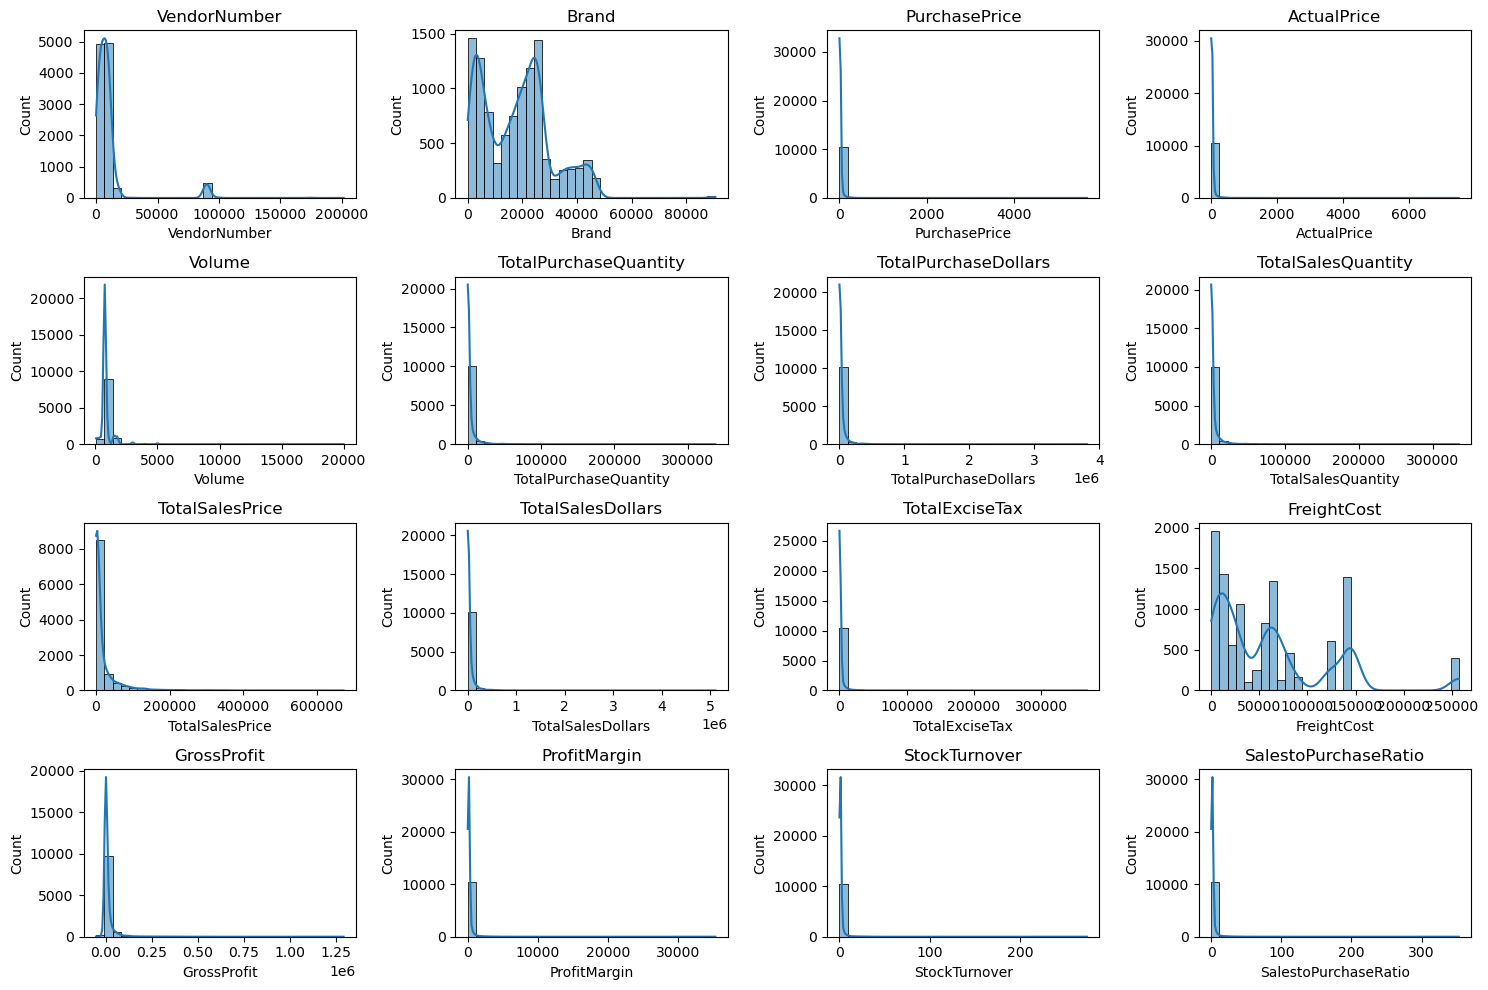

In [4]:
#identifying numerical columns 
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

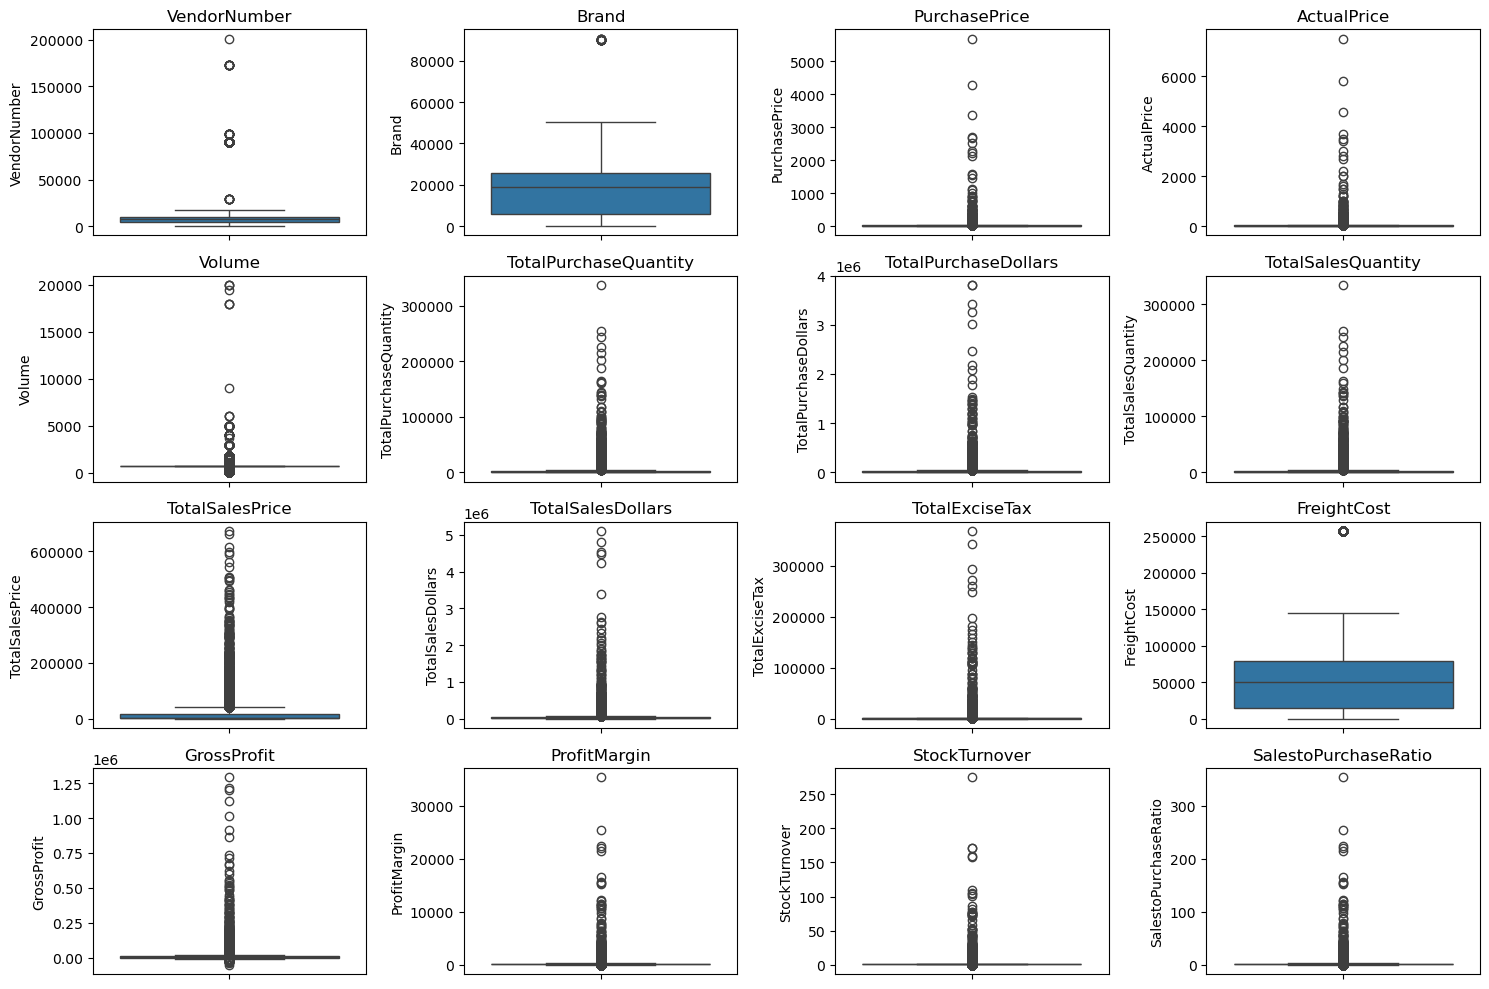

In [5]:
#identifying outliers with boxplots 

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
#removing inconsistencies
df= pd.read_sql_query(""" 
    SELECT *
    FROM vendor_sales_summary
    WHERE "GrossProfit">0
    AND "ProfitMargin">0
    AND "TotalSalesQuantity">0""", engine)

In [7]:
df['ProfitMargin'] = ((df['TotalSalesDollars'] - df['TotalPurchaseDollars']) / df['TotalSalesDollars']) * 100

numerical_cols = df.select_dtypes(include=np.number).columns

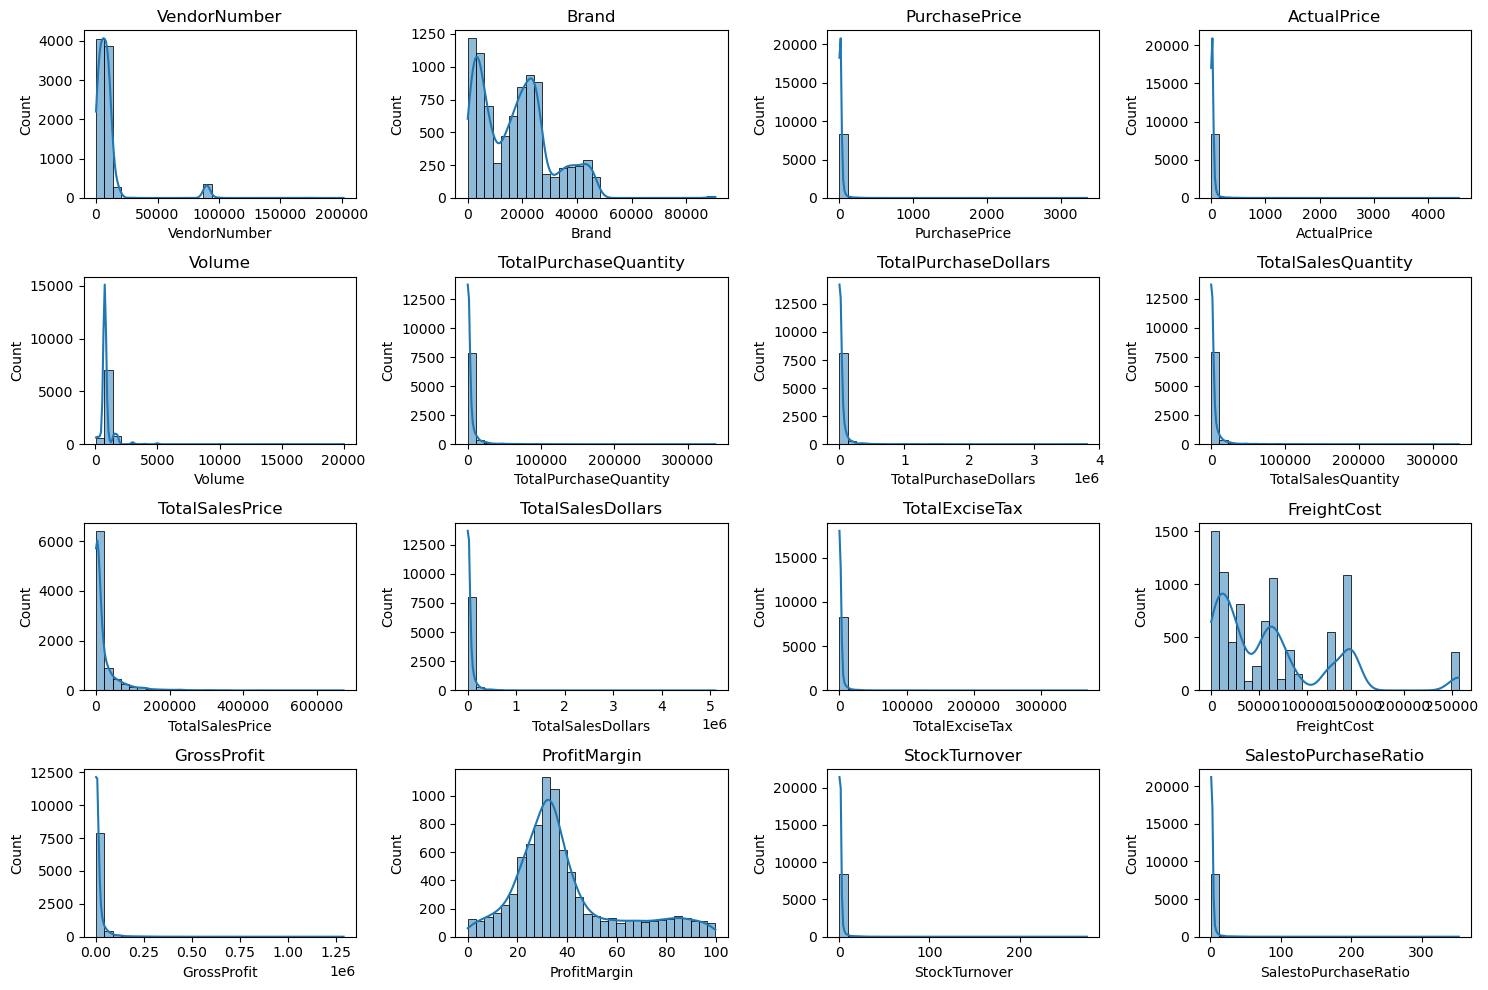

In [8]:
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

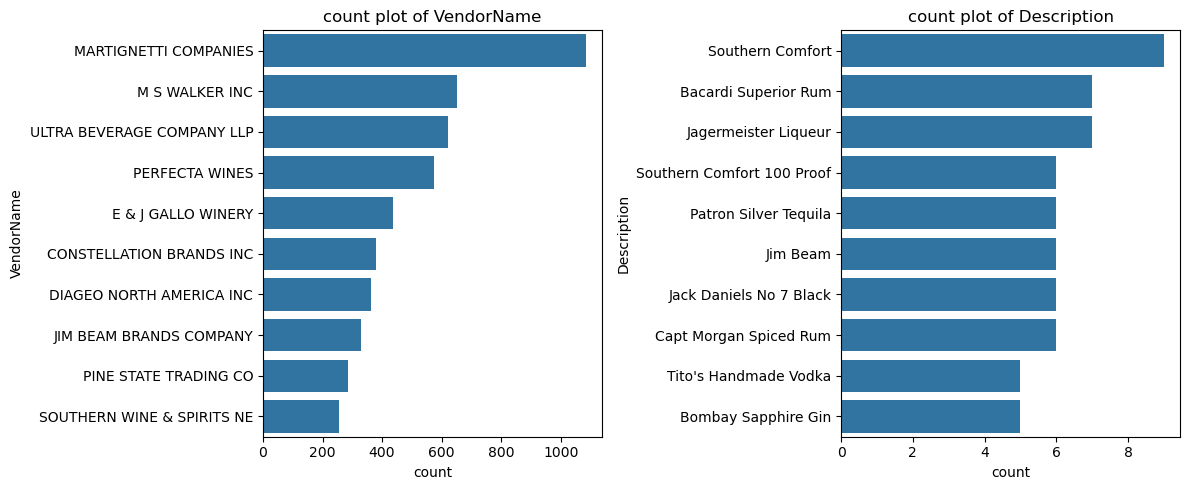

In [9]:
#count plots for categorical columns 

categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

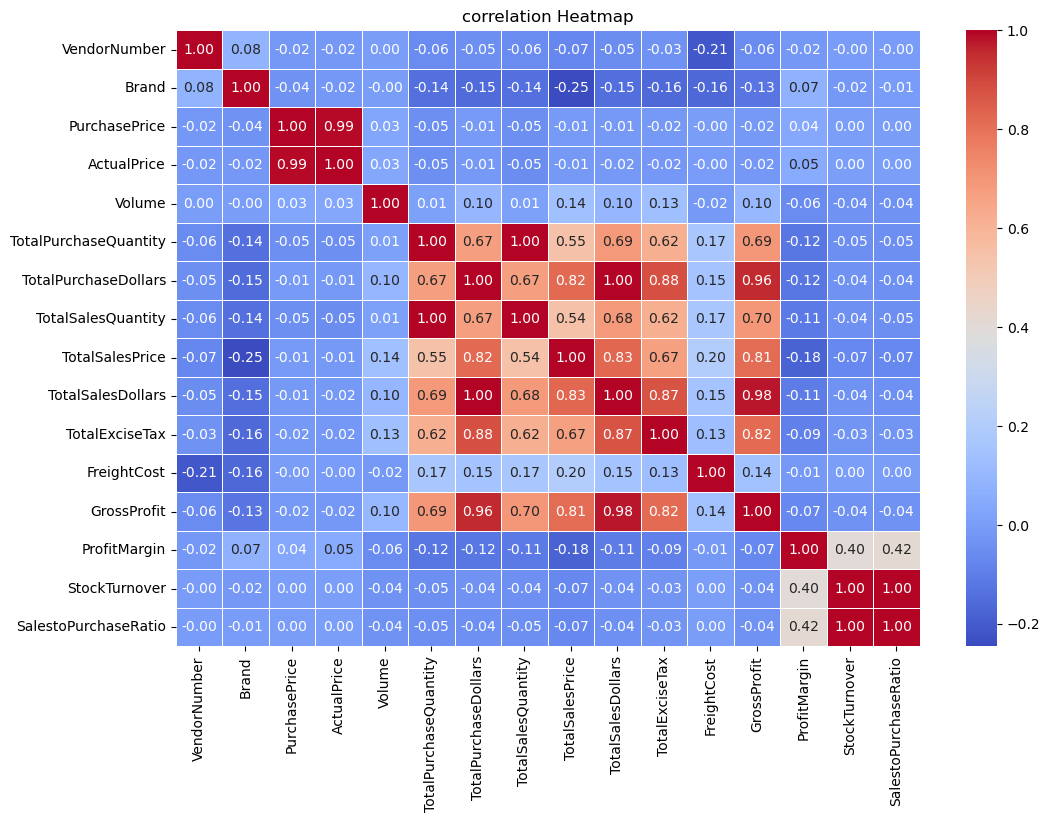

In [10]:
#correlation heatmap

plt.figure(figsize=(12,8))
correlation_matrix= df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("correlation Heatmap")
plt.show()


In [11]:
#working on the first business problem 
#•	Identify underperforming brands that require promotional or pricing adjustments.

brand_performance = df.groupby('Description').agg({
          'TotalSalesDollars':'sum',
          'ProfitMargin':'mean'}).reset_index()

In [12]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [13]:
low_sales_threshold

560.299

In [14]:
high_margin_threshold

64.97017552750113

In [15]:
 #filter brands with low sales but hight profit margins

target_brands= brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margins: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margins: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [16]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<10000]

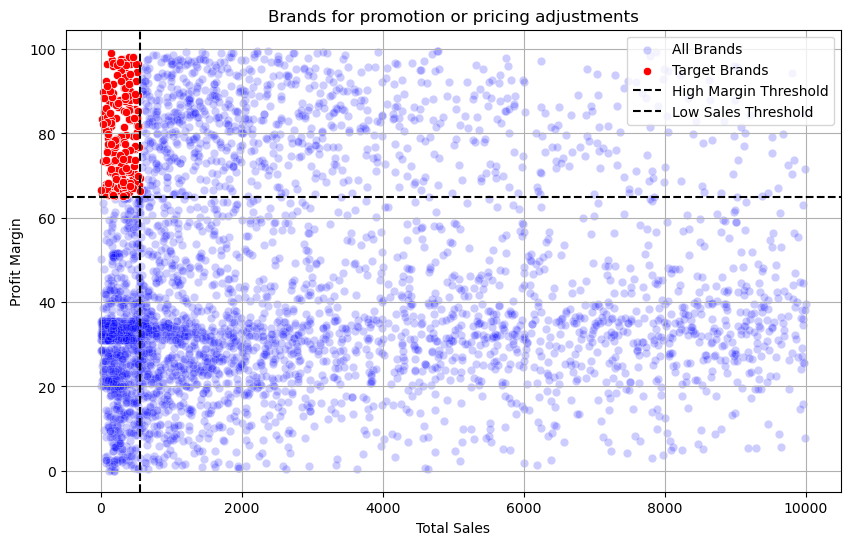

In [17]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales")
plt.ylabel("Profit Margin")
plt.title("Brands for promotion or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#working on second business problem
#which vendors and brands demonstrate highest sales performance

def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

#Top Vendors and Brands by sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)

In [19]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      6.799010e+07
MARTIGNETTI COMPANIES         3.933036e+07
PERNOD RICARD USA             3.206320e+07
JIM BEAM BRANDS COMPANY       3.142304e+07
BACARDI USA INC               2.485482e+07
CONSTELLATION BRANDS INC      2.421875e+07
E & J GALLO WINERY            1.839990e+07
BROWN-FORMAN CORP             1.824723e+07
ULTRA BEVERAGE COMPANY LLP    1.650254e+07
M S WALKER INC                1.470646e+07
Name: TotalSalesDollars, dtype: float64

In [20]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [21]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

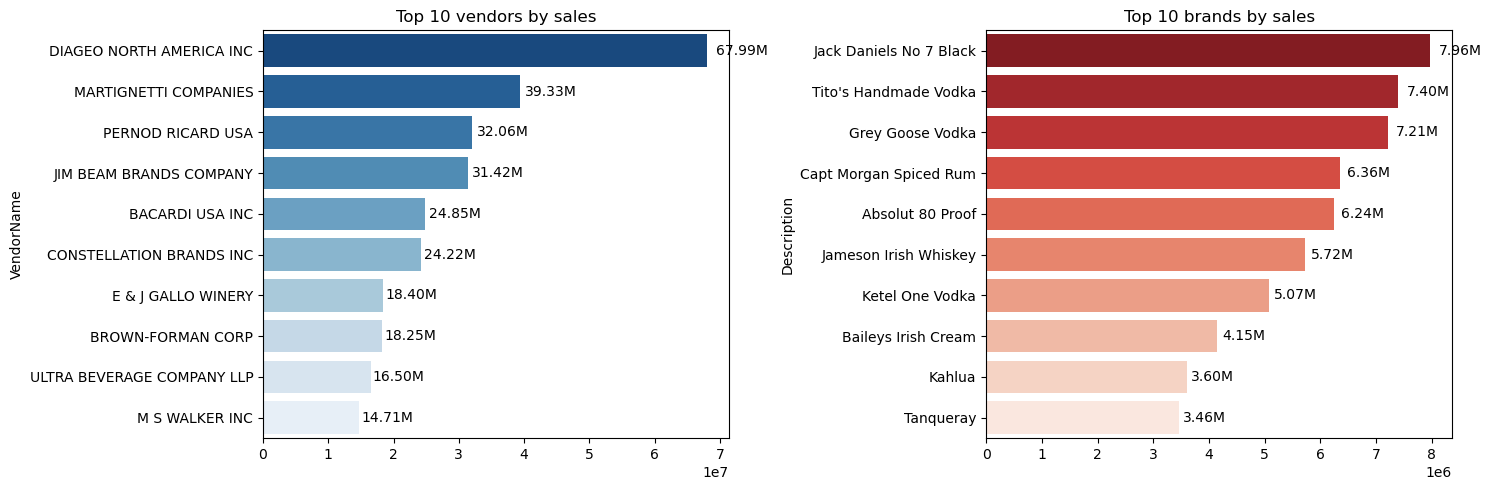

In [22]:
plt.figure(figsize=(15,5))

#plot for top vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10,color='black')

#plot for Top Brands
plt.subplot(1,2,2)
ax2= sns.barplot(y=top_brands.index.astype(str), x=top_brands.values,palette="Reds_r")
plt.title("Top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10,color='black')

plt.tight_layout()
plt.show()

In [23]:
#to find out which vendors contribute the most to total purchase dollars

vendor_performance = df.groupby('VendorName').agg({
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum',
    'TotalPurchaseDollars':'sum'
}).reset_index()
vendor_performance.shape

(119, 4)

In [24]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%',ascending =False),2)

In [25]:
# Display the top 10 vendors
top_vendors =vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors[ 'TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors[ 'TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors[ 'GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18


In [26]:
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalSalesDollars,GrossProfit,TotalPurchaseDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,67.99M,17.89M,50.10M,16.30,16.30
57,MARTIGNETTI COMPANIES,39.33M,13.83M,25.50M,8.30,24.60
68,PERNOD RICARD USA,32.06M,8.21M,23.85M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,31.42M,7.93M,23.49M,7.64,40.00
6,BACARDI USA INC,24.85M,7.42M,17.43M,5.67,45.67
20,CONSTELLATION BRANDS INC,24.22M,8.95M,15.27M,4.97,50.64
11,BROWN-FORMAN CORP,18.25M,5.01M,13.24M,4.31,54.95
30,E & J GALLO WINERY,18.40M,6.33M,12.07M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,16.50M,5.34M,11.17M,3.63,62.51
53,M S WALKER INC,14.71M,4.94M,9.76M,3.18,65.69


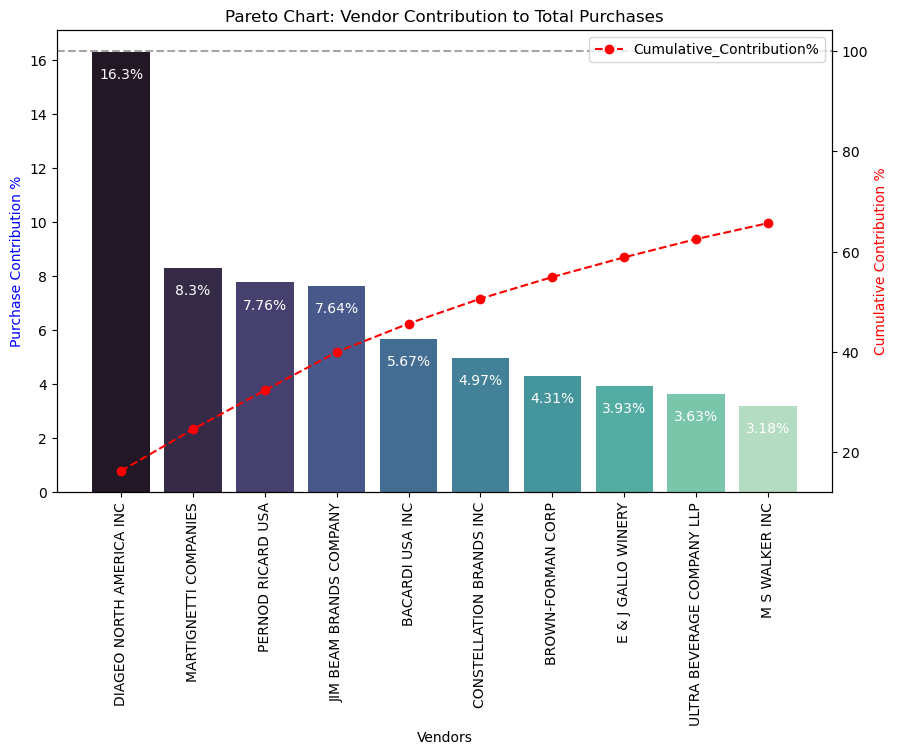

In [27]:
fig, ax1 = plt.subplots(figsize =(10,6))

#Bar plot for purschase contribution percentage
sns.barplot(x=top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette ="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value-1,str(value)+'%', ha='center', fontsize = 10, color ='white')

#line plot for cumulative contribution percentage
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution%'], color ='red', marker='o', linestyle='dashed', label ='Cumulative_Contribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

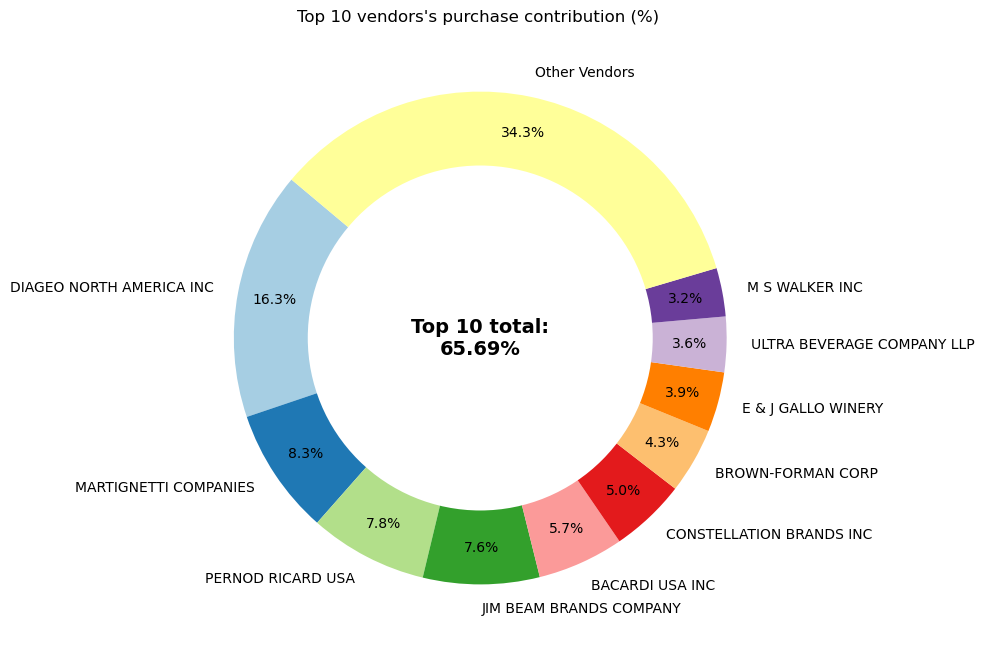

In [28]:
# to show how much of total procurement is dependent on the top vendors?
vendors = list(top_vendors['VendorName'].values)
purchase_contributions= list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contributions = 100-total_contribution

#append "other vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contributions)

#donut chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels = vendors, autopct ='%1.1f%%', startangle=140, pctdistance =0.85, colors= plt.cm.Paired.colors)

#draw a white circle in the center to create a donut effect
centre_circle = plt.Circle((0,0),0.70, fc='white')
fig.gca().add_artist(centre_circle)

#add total contribution attribution in the center
plt.text(0,0,f"Top 10 total:\n{total_contribution:.2f}%",fontsize =14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 vendors's purchase contribution (%) ")
plt.show()


In [29]:
#working on the third business problem 
# does purchasing in bulk reduce the unit price and what is the optimal volume for cost savings

df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,Description,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,26.27,36.99,1750.0,145080.0,3811251.60,Jack Daniels No 7 Black,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,23.19,28.99,1750.0,164038.0,3804041.22,Tito's Handmade Vodka,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,18.24,24.99,1750.0,187407.0,3418303.68,Absolut 80 Proof,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,16.17,22.99,1750.0,201682.0,3261197.94,Capt Morgan Spiced Rum,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,21.89,29.99,1750.0,138109.0,3023206.01,Ketel One Vodka,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,1.32,4.99,750.0,2.0,2.64,Concannon Glen Ellen Wh Zin,5.0,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8561,8004,SAZERAC CO INC,5683,0.39,0.49,50.0,6.0,2.34,Dr McGillicuddy's Apple Pie,134.0,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8562,3924,HEAVEN HILL DISTILLERIES,9123,0.74,0.99,50.0,2.0,1.48,Deep Eddy Vodka,2.0,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8563,3960,DIAGEO NORTH AMERICA INC,6127,1.47,1.99,200.0,1.0,1.47,The Club Strawbry Margarita,72.0,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [30]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "large"])

In [31]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.057543
Medium,15.486414
large,10.777625


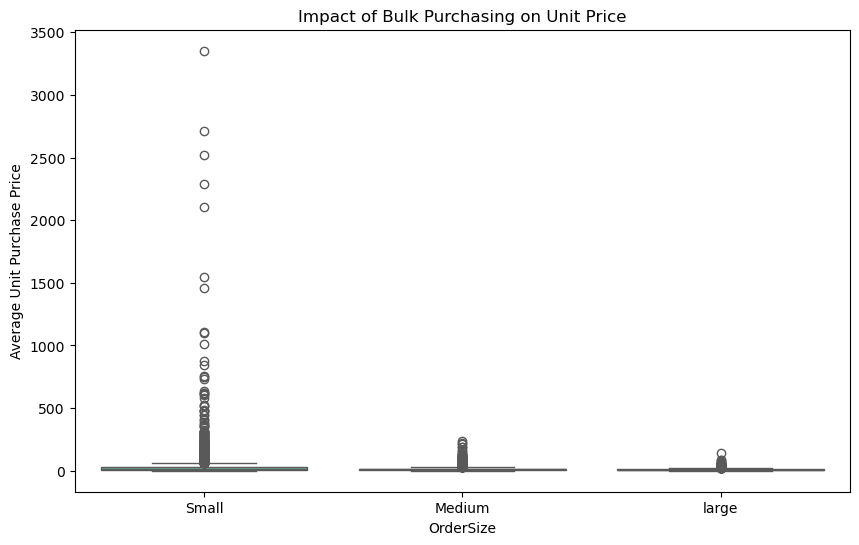

In [32]:
 plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize", y="UnitPurchasePrice", palette ="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

In [33]:
#fourth business problem 
#which vendors have low inventory turnover, indicating excess stock and slow moving products

low_turnover_vendors = df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending =True).head(10)

In [34]:
#fifth business problem 
#how much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it 

df["UnsoldInventoryValue"] = (df['TotalPurchaseQuantity']-df['TotalSalesQuantity'])*df['PurchasePrice']
print('Total Unsold Capital:', format_dollars(df['UnsoldInventoryValue'].sum()))

Total Unsold Capital: 2.71M


In [35]:
#aggregate capital sold per vendor 
Inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

#sort vendors with highest locked capital
Inventory_value_per_vendor = Inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending =False)
Inventory_value_per_vendor["UnsoldInventoryValue"] = Inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)
Inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.65K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [36]:
#what are the 95% confidence intervals for profit margins of top-performing and low-performing vendors
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [37]:
top_vendors = df[df['TotalSalesDollars']>=top_threshold]['ProfitMargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<=low_threshold]['ProfitMargin'].dropna()

In [38]:
def confidence_interval(data, confidence =0.95):
    mean_val = np.mean(data)
    std_err = np.std(data,ddof=1) / np.sqrt(len(data)-1)
    t_critical = stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val+margin_of_error
    

 Top Vendors 95% CI: (30.74, 31.61), Mean: 31.17
 Low Vendors 95% CI: (40.48, 42.62), Mean: 41.55


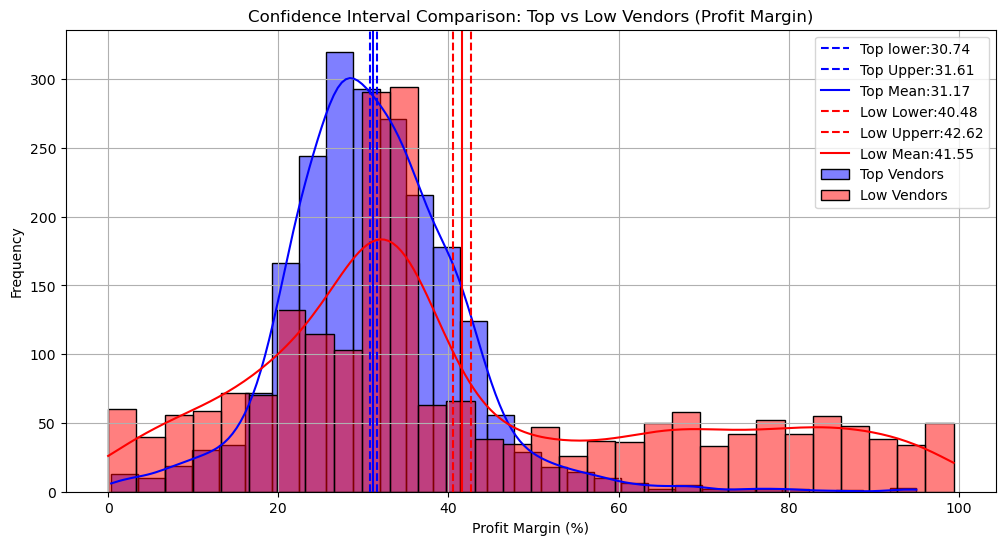

In [39]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f" Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f" Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12,6))

#top vendors plot 
sns.histplot(top_vendors, kde= True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color ="blue", linestyle="--", label=f"Top lower:{top_lower:.2f}")
plt.axvline(top_upper, color ="blue", linestyle="--", label=f"Top Upper:{top_upper:.2f}")
plt.axvline(top_mean, color ="blue", linestyle="-", label=f"Top Mean:{top_mean:.2f}")

#low vendors plot
sns.histplot(low_vendors, kde= True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower:{low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upperr:{low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean:{low_mean:.2f}")

#finalized plot
plt.title("Confidence Interval Comparison: Top vs Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [40]:
df.to_csv("vendor_sales_summary.csv", index=False)
print("generated successfully!")

generated successfully!


In [41]:
brand_performance.to_csv("brand_performance.csv", index=False)
top_vendors.to_csv("purchase_contribution.csv", index=False)
low_turnover_vendors.to_csv("low_turnover_vendors.csv", index=False)
print(" All generated successfully!")

 All generated successfully!


In [42]:
#quick fix for top_vendors(purchase_contribution csv)
# Recreate clean version without applying string formatting
vendor_performance = df.groupby('VendorName').agg({
    'TotalSalesDollars':'sum',
    'GrossProfit':'sum',
    'TotalPurchaseDollars':'sum'
}).reset_index()

vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum() * 100
vendor_performance = vendor_performance.sort_values('PurchaseContribution%', ascending=False).reset_index(drop=True)

top_vendors = vendor_performance.head(10).copy()
top_vendors['Cumulative_Contribution%'] = top_vendors['PurchaseContribution%'].cumsum()

# Now export clean numeric data
top_vendors.to_csv("purchase_contribution.csv", index=False)


In [88]:
#quick fix for low_turnover_vendors

low_turnover_vendors = df[df['StockTurnover'] < 1] \
    .groupby('VendorName')[['StockTurnover']] \
    .mean() \
    .sort_values('StockTurnover', ascending=True) \
    .head(10) \
    .reset_index()

low_turnover_vendors.to_csv("low_turnover_vendors.csv", index=False)
print("csv updated successfully!")

csv updated successfully!
